In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

1. getting dataset

In [2]:
train_data = torchvision.datasets.MNIST(root = r'C:\Users\DATA', train=True, download=True, transform=ToTensor() )

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\DATA
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data = torchvision.datasets.MNIST(root = r'C:\Users\DATA', train=False, download=False, transform=ToTensor() )

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\DATA
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
image, label = train_data[1]

In [12]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

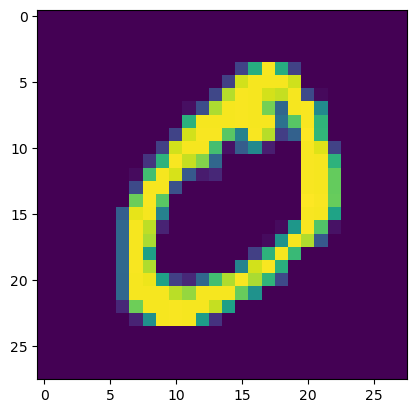

In [15]:
plt.imshow(image.squeeze())

2. prepare dataloader

In [16]:
image.shape

torch.Size([1, 28, 28])

In [17]:
from torch.utils.data import DataLoader

In [37]:
batch_size = 32

In [38]:
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [39]:
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [40]:
train_dataloader

In [41]:
len(train_dataloader)

1875

In [42]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

3. building model

In [47]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 50),
            nn.ReLU(),
            nn.Linear(50, 10),
            nn.ReLU()
        )
    def forward(self, X):
        return self.layer(X)

In [48]:
model = model()

In [49]:
model

model(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): ReLU()
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [51]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

In [53]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [52]:
epochs = 3
torch.manual_seed(101)

for epoch in range(epochs):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model.train()
        optim.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        loss.backward()
        optim.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
    train_loss /= len(train_dataloader)      
    print(f'Train loss: {train_loss:.5f}   |   Epoch: {epoch}')

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.49069   |   Epoch: 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.18564   |   Epoch: 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.13651   |   Epoch: 2


In [55]:
loss, acc = 0, 0
model.eval()
for X, y in test_dataloader:
    test_pred = model(X)
    loss += loss_fn(test_pred, y)
    acc += accuracy_fn(y, test_pred.argmax(dim = 1))

loss /= len(test_dataloader)
acc /= len(test_dataloader)
print(f"model_name: {model}, model_loss: {loss}, model_acc: {acc}")

model_name: model(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): ReLU()
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): ReLU()
  )
), model_loss: 0.12601374089717865, model_acc: 96.30591054313099
